# NLTK Book Chapter 2

*as with Chapter 1, be sure to run the following in the python interpreter beforehand:*

    >>> import nltk
    >>> nltk.download()

    (download nltk_book corpus)

# Accessing Text Corpora and Lexical Resources

## Accessing Text Corpora

**Gutenberg Corpus**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

---
Pick *Emma* (Jane Austen) from corpus

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [3]:
len(emma)

192427

In [4]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma = gutenberg.words('austen-emma.txt')
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [6]:
type(gutenberg)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

---
other information from the `gutenberg` object

In [7]:
print('avg word length |', 'avg sentence length |', '# times each vocab item appears on avg |', 'fileid')

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars / num_words), 
          round(num_words/num_sents), 
          round(num_words/num_vocab),
          fileid)


avg word length | avg sentence length | # times each vocab item appears on avg | fileid
5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


"average word length appears to be a general property of English, since it has a recurrent value of 4" -- `num_chars` counts spaces though...
    
Other values seem to be characteristics of particular authors.

Methods:
* **`raw`** gives raw text as a string
* **`words`** gives a list-like object of words in the text
* **`sents`** gives a list-like object of sentences from the text (each sentence is a list of words)


In [8]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [9]:
macbeth_sentences[1116]

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [10]:
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len][:1]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

## Web and Chat Text

* Firefox discussion forum
* Conversations overheard in New York
* movie script from Pirates of the Caribbean
* personal ads
* wine reviews

In [11]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, '\t', webtext.raw(fileid)[:65], '...', end='\n\n')

firefox.txt 	 Cookie Manager: "Don't allow sites that set removed cookies to se ...

grail.txt 	 SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...

overheard.txt 	 White guy: So, do you have any plans for this evening?
Asian girl ...

pirates.txt 	 PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...

singles.txt 	 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...

wine.txt 	 Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...



---
**Corpus of instant messaging chat sessions**


In [12]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

---
## Brown Corpus

Text sources categorized by genre (news, editorial, etc.)

In [13]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

*Selecting multiple categories...*

In [14]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [15]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [16]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

---
*comparing genres by their usage of modal verbs*

In [17]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']

for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

---
*obtaining counts for each genre of interest*

In [18]:
cfd = nltk.ConditionalFreqDist((genre, word) 
                               for genre in brown.categories() 
                               for word in brown.words(categories=genre))
cfd

defaultdict(nltk.probability.FreqDist,
            {'adventure': Counter({'Without': 1,
                      'lighted': 5,
                      'laden': 1,
                      'shimmering': 1,
                      'More': 1,
                      'assent': 1,
                      'festival': 1,
                      'speak': 6,
                      'located': 2,
                      'pandanus': 1,
                      'education': 4,
                      'house': 60,
                      'muscles': 5,
                      "She'd": 1,
                      'tube': 1,
                      'travelers': 1,
                      'Adams': 5,
                      'waters': 6,
                      'forearm': 1,
                      'dig': 2,
                      'hurdled': 1,
                      'suds': 3,
                      'use': 15,
                      'calloused': 1,
                      'killed': 15,
                      'experience': 1,
                      'su

In [19]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                 can could  may might must will 
           news   93   86   66   38   50  389 
       religion   82   59   78   12   54   71 
        hobbies  268   58  131   22   83  264 
science_fiction   16   49    4   12    8   16 
        romance   74  193   11   51   45   43 
          humor   16   30    8    8    9   13 


*most frequent modal in 'news' is **will**, most frequent modal in 'romance' is **could***

---

## Reuters Corpus

documents are grouped into training and test sets

**something wrong with this corpus + Python 3.5.1**

In [20]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [21]:
from nltk.corpus import reuters
# reuters.categories() ## assertion error in Python 3.5

In [22]:
# reuters.categories('training/9865') ## assertion error in Python 3.5

In [23]:
# reuters.fileids('barley') ## ValueError: Category barley not found

In [24]:
# reuters.fileids(['barley', 'corn']) 

# AssertionError
# /usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/zipfile.py in _fpclose(self, fp)
#    1712 
#    1713     def _fpclose(self, fp):
# -> 1714         assert self._fileRefCnt > 0
#    1715         self._fileRefCnt -= 1
#    1716         if not self._fileRefCnt and not self._filePassed:


---

## Inaugural Address Corpus

In [25]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [26]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

*all words in the Inaugural Address Corpus that begin with `america` or `citizen`, counts over time (counts are not normalized for document length)*

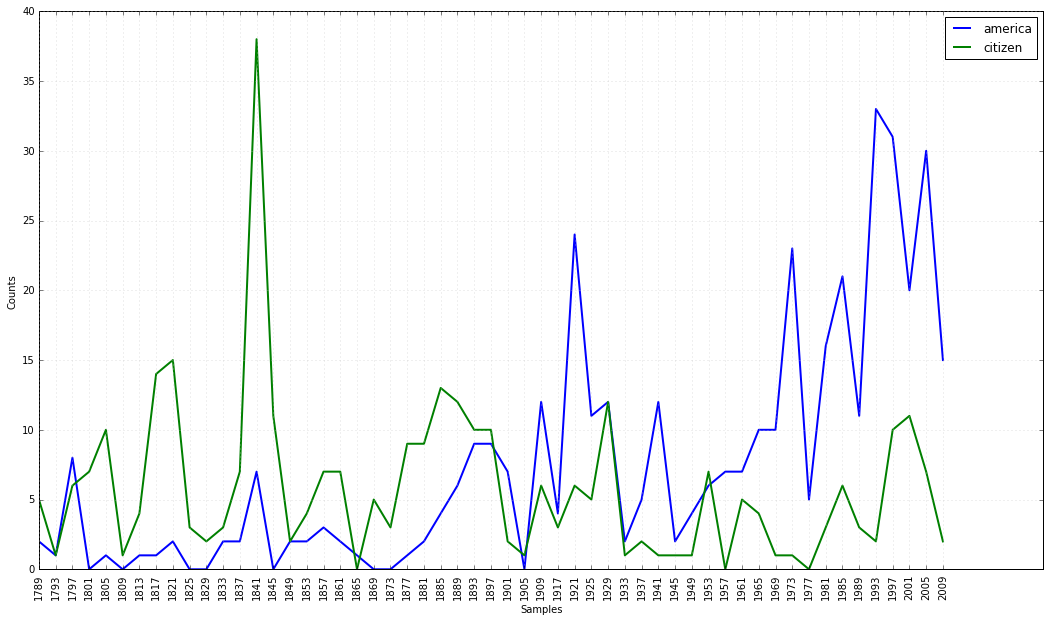

In [27]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen']
                               if w.lower().startswith(target))
plot = plt.figure(figsize=(18,10))
cfd.plot()

## Annotated Text Corpora

*need to download other corpora through* `nltk.download()`

## Corpora in Other Languages

*need to download other corpora through* `nltk.download()`

## Loading your own Corpus

Use **`PlaintextCorpusReader`**

*commented out -- no corpus*

In [28]:
# from nltk.corpus import PlaintextCorpusReader
# corpus_root = '/usr/share/dict'

# # the second parameter to PlaintextCorpusReader can be:
# # - a list of fileids, like ['a.txt', 'test/b.txt']
# # - a pattern that matches all fileids, like '[abc]/.*\.txt'
# wordlists = PlaintextCorpusReader(corpus_root, '.*')
# wordlists.fileids()

In [29]:
# wordlists.words('connectives')

# Conditional Frequency Distributions

Remember that we can compute occurrences of items (for example, words) in a list using **`FreqDist(mylist)`**

"A *conditional frequency distribution* is a collection of frequency distributions, each one for a different *condition*"

Use **`ConditionalFreqDist`**

## Conditions and events

Conditional frequency distribution needs to pair observable events with conditions, so the input is a ***sequence of pairs*** (not just a list of words).

    text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
    pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]
    
*Pairs have the form* `(condition, event)`
    
## Counting Words by Genre

In [30]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist((genre, word) 
                               for genre in brown.categories()
                               for word in brown.words(categories=genre))
cfd

defaultdict(nltk.probability.FreqDist,
            {'adventure': Counter({'Without': 1,
                      'lighted': 5,
                      'laden': 1,
                      'shimmering': 1,
                      'More': 1,
                      'assent': 1,
                      'festival': 1,
                      'speak': 6,
                      'located': 2,
                      'pandanus': 1,
                      'education': 4,
                      'house': 60,
                      'muscles': 5,
                      "She'd": 1,
                      'tube': 1,
                      'travelers': 1,
                      'Adams': 5,
                      'waters': 6,
                      'forearm': 1,
                      'dig': 2,
                      'hurdled': 1,
                      'suds': 3,
                      'use': 15,
                      'calloused': 1,
                      'killed': 15,
                      'experience': 1,
                      'su

*simpler example...*

* Look at two genres: news and romance
* For each genre, loop over every word in the genre to produce (genre, word) pairs


In [31]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
len(genre_word)

170576

In [32]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [33]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [34]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

defaultdict(nltk.probability.FreqDist,
            {'news': Counter({'Without': 4,
                      'festival': 2,
                      '5-run': 2,
                      'Motorists': 1,
                      'builders': 7,
                      'taxing': 1,
                      'More': 12,
                      'tribunals': 1,
                      '23': 9,
                      'Anthony': 1,
                      'assent': 1,
                      'speak': 3,
                      'located': 6,
                      'economics': 3,
                      'contented': 1,
                      'education': 31,
                      'house': 26,
                      'promises': 3,
                      'skilled': 1,
                      'conspirators': 2,
                      'officiating': 1,
                      'overdeveloped': 1,
                      'Gerald': 3,
                      'tube': 1,
                      'Wilmette': 3,
                      'building': 15,
   

In [35]:
cfd.conditions()

['romance', 'news']

*each condition is just a frequency distribution*

In [36]:
print(cfd['news'])
print(cfd['romance'])

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


In [37]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [38]:
cfd['romance']['could']

193

## Plotting and Tabulating Distributions

Generating `(condition, event)` pairs for the Inaugural Address corpus -- using the fact that all filenames start with the year, such as `1865-Lincoln.txt`

In [39]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [40]:
inaugural.words('2009-Obama.txt')

['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]

Loop through all words in all fileids and create pairs that are of the form:
* `('america', '1997')`
* `('citizen', '1993')`

In [41]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) 
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen']
                               if w.lower().startswith(target))
cfd

defaultdict(nltk.probability.FreqDist,
            {'america': Counter({'1789': 2,
                      '1793': 1,
                      '1797': 8,
                      '1805': 1,
                      '1813': 1,
                      '1817': 1,
                      '1821': 2,
                      '1833': 2,
                      '1837': 2,
                      '1841': 7,
                      '1849': 2,
                      '1853': 2,
                      '1857': 3,
                      '1861': 2,
                      '1865': 1,
                      '1877': 1,
                      '1881': 2,
                      '1885': 4,
                      '1889': 6,
                      '1893': 9,
                      '1897': 9,
                      '1901': 7,
                      '1909': 12,
                      '1917': 4,
                      '1921': 24,
                      '1925': 11,
                      '1929': 12,
                      '1933': 2,
                      

---
A different conditional frequency distribution. Condition is the **name of the language** and counts are **word lengths**

In [42]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
udhr.words('Chickasaw'+'-Latin1')

['Hattak', 'Móma', 'Iholisso', 'Ishtaa', '-', 'aya', ...]

In [43]:
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))

**`plot()`** and **`tabulate()`** methods allow a **`conditions`** parameter to specify a *subset of conditions*

In [44]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],
             samples=range(10),
             cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


(leaving out `conditions` returns all conditions)

In [45]:
cfd.tabulate(samples=range(10),
             cumulative=True)

                         0    1    2    3    4    5    6    7    8    9 
            Chickasaw    0  411  510  551  619  710  799  876  946  995 
              English    0  185  525  883  997 1166 1283 1440 1558 1638 
       German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 
Greenlandic_Inuktikut    0  139  150  151  154  175  182  241  259  283 
     Hungarian_Magyar    0  302  431  503  655  767  881  972 1081 1171 
          Ibibio_Efik    0  228  440  915 1418 1705 1867 1974 2049 2074 


---
*Your Turn: Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing a list of days of the week, i.e. ['Monday', ...]. Now tabulate the counts for these words using cfd.tabulate(samples=days). Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: samples=['Monday', ...].*

In [46]:
from nltk.corpus import brown
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
genres = ['news', 'romance']
cfd = nltk.ConditionalFreqDist((genre, word)
                               for genre in genres
                               for word in brown.words(categories=genre)
                               if word in days)
cfd

defaultdict(nltk.probability.FreqDist,
            {'news': Counter({'Friday': 41,
                      'Monday': 54,
                      'Thursday': 20,
                      'Tuesday': 43,
                      'Wednesday': 22}),
             'romance': Counter({'Friday': 3,
                      'Monday': 2,
                      'Thursday': 1,
                      'Tuesday': 3,
                      'Wednesday': 3})})

In [47]:
cfd.tabulate(samples=days)

        Monday Tuesday Wednesday Thursday Friday 
   news   54   43   22   20   41 
romance    2    3    3    1    3 


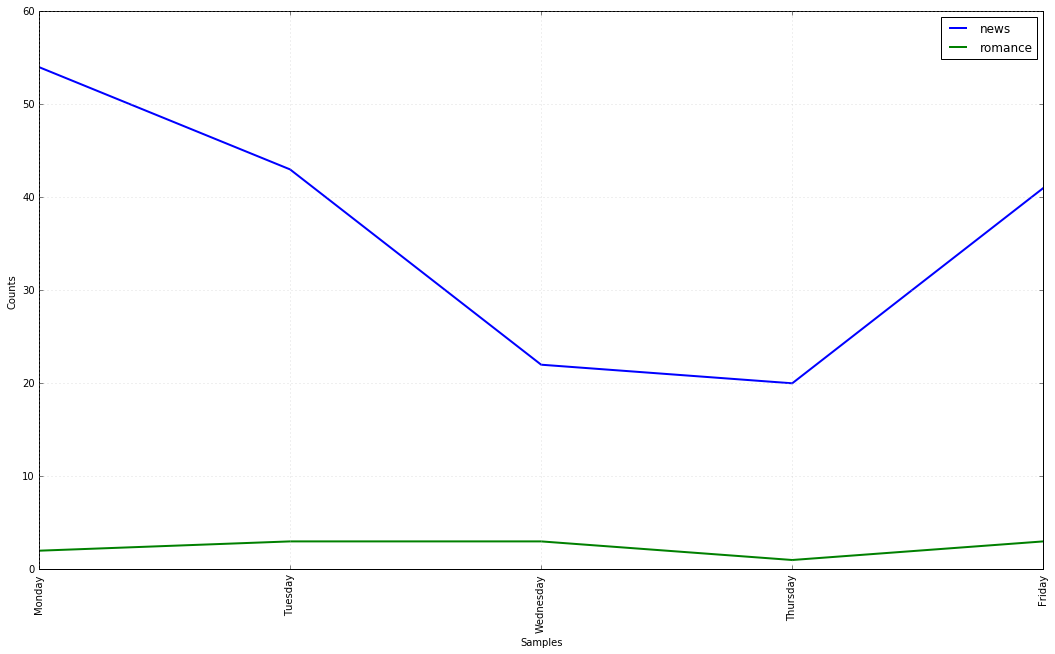

In [48]:
plot = plt.figure(figsize=(18,10))
cfd.plot(samples=days)

## Generating Random Text with Bigrams

Creating a table of bigrams (word pairs)

**`bigrams()`** builds a list of consecutive word pairs from a list of words (returns a generator)

In [49]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
        'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

write a function `generate_model()` that runs a loop to generate text based on maximum frequencies

In [50]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max() # choose next word based on max frequency following another word

In [51]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
cfd

defaultdict(nltk.probability.FreqDist,
            {'Beerlahairoi': Counter({';': 1}),
             'lighted': Counter({'off': 1, 'upon': 1}),
             'pillows': Counter({',': 2}),
             'laden': Counter({'with': 2}),
             'na': Counter({'and': 1}),
             'Escape': Counter({'for': 1}),
             'blood': Counter({',': 2,
                      ';': 1,
                      '?': 1,
                      'be': 1,
                      'crieth': 1,
                      'from': 1,
                      'is': 1,
                      'of': 2,
                      'thereof': 1}),
             'Eber': Counter({',': 1,
                      '.': 1,
                      ':': 1,
                      'four': 1,
                      'lived': 2,
                      'were': 1}),
             'drove': Counter({'.': 1,
                      'and': 1,
                      'by': 1,
                      'out': 1,
                      'them': 1,
                     

In [52]:
cfd['living']

Counter({',': 1, '.': 1, 'creature': 7, 'soul': 1, 'substance': 2, 'thing': 4})

In [53]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

This code generates bigrams from text, constructs a CFD for which words follow an input word -- this is used to generate text.

*"this simple approach to text generation tends to get stuck in loops"*

---
# More Python: Reusing Code

*skipping this section*

---
# Lexical Resources ('lexicon')

*a collection of words and/or phrases along with associated information such as part of speech and sense definitions*

*A **lexical entry** consists of a **headword (lemma)** along with additional information such as the part of speech and the sense definition*

## Wordlist Corpora

*the **Words Corpus** is the `/usr/share/dict/words` file from Unix systems*

In [54]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words()) ## Words Corpus
    unusual = text_vocab - english_vocab
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [55]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

---
Corpus of **stopwords** (high-frequency words like *the, to, also* that we often want to filter out)

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

What fraction of words in a text are not in the stopwords list?

In [57]:
def content_fraction(text):
    
    stopwords = nltk.corpus.stopwords.words('english')
    
    content = [w for w in text if w.lower() not in stopwords] # filtering out all stopwords
    
    return len(content)/len(text)

# this is in the example, but something is wrong with this corpus + Python 3.5.1...
# content_fraction(nltk.corpus.reuters.words())

content_fraction(nltk.corpus.gutenberg.words())

0.5795676173409271

---
Wordlist and word puzzle solving -- How many words of 4 letters or more can you make from the characters [E, G, I, V, R, V, O, N, L]?

Rules:
* No plurals ending in "s"
* No foreign words
* No proper names

*use `FreqDist` to generate frequencies for each character in the "word" **egivrvonl***

In [58]:
puzzle_letters = nltk.FreqDist('egivrvonl')
puzzle_letters

Counter({'e': 1, 'g': 1, 'i': 1, 'l': 1, 'n': 1, 'o': 1, 'r': 1, 'v': 2})

In [59]:
obligatory = 'r'
wordlist = nltk.corpus.words.words() # Words Corpus
[w for w in wordlist if len(w) >= 6
                     and obligatory in w
                     and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

**comparing `FreqDist` objects...**

*lets us check if the frequency of each letter in the given word is <= the frequency of the letter in the puzzle (`puzzle_letters`)*

In [60]:
puzzle_letters = nltk.FreqDist('egivrvonl')

nltk.FreqDist('glover') < puzzle_letters

True

In [61]:
nltk.FreqDist('egivrvon') <= puzzle_letters

True

In [62]:
nltk.FreqDist('egivrvonl') <= puzzle_letters

True

In [63]:
nltk.FreqDist('egivrvonll') <= puzzle_letters

False

---
**Names** corpus -- contains 8,000 first names categorized by gender

(male / female names stored in separate files)

Find names which appear in both files

In [64]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [65]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

**names ending in 'a' are almost always female**

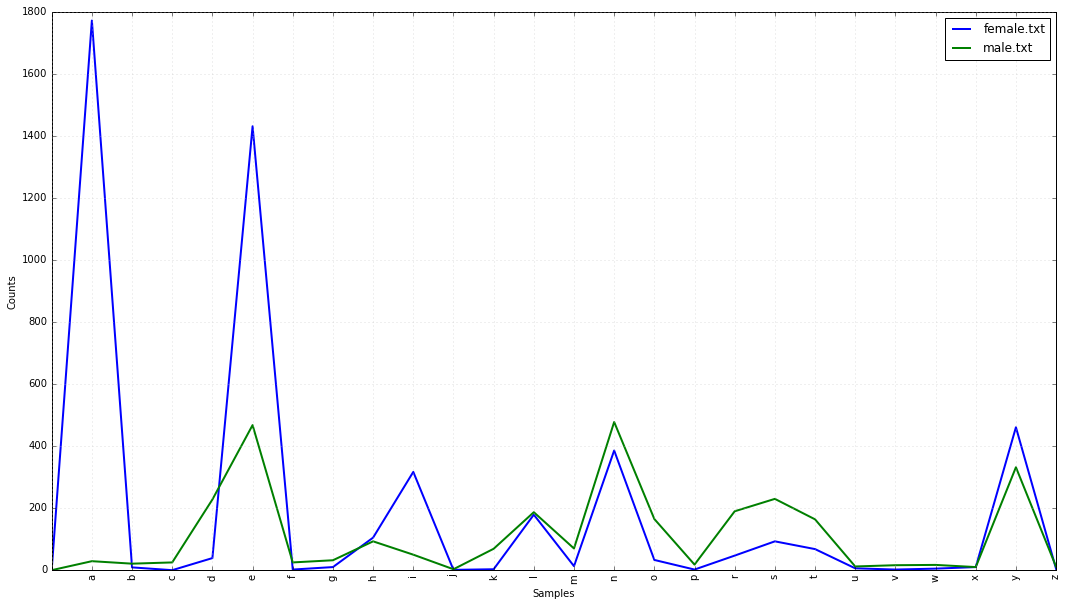

In [66]:
cfd = nltk.ConditionalFreqDist((fileid, name[-1])
                               for fileid in names.fileids()
                               for name in names.words(fileid))
plot = plt.figure(figsize=(18,10))
cfd.plot()

## A Pronouncing Dictionary

**CMU Pronouncing Dictionary** -- *contains words followed by some properties of the word*

In [67]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [68]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


Lexicon above provides a list of phonetic codes (distinct labels for each contrastive sound -- *phones*) for each word.

---

Look for entries whose pronunciation consists of 3 phones, and print those with the first and third equal to 'P' and 'T', respectively

In [69]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

Find all words whose pronunciation ends with a **syllable sounding like *nicks*** (similar `for` but in a list comprehension)

In [70]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

**words ending in *n* but with last syllable pronounced like *m***

In [71]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

**nonredundant/sorted list of first two letters of words that have a first syllable pronounced like *N* but a first letter that is not *n***

In [72]:
sorted(set([w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n']))

['gn', 'kn', 'mn', 'pn']

**Phones contain digits to represent *primary stress* (1), *secondary stress* (2), and *no stress* (0).**

In [73]:
def stress(pron):
    return [char 
            for phone in pron   
            for char in phone 
            if char.isdigit()]

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [74]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae',
 'adulteration',
 'affiliation',
 'affiliations',
 'aficionados',
 'agglomeration',
 'ahasuerus',
 'ajinomoto',
 'alleviation',
 'amalgamation',
 'ambrosiano',
 'amelioration',
 'americana',
 "americana's",
 'americanas',
 'americano',
 'americanos',
 'anachronistic',
 'anencephalic',
 'annihilation',
 'antagonistic',
 'anticipation',
 'anticipations',
 'apocalyptic',
 'apologetic',
 'apotheosis',
 'appreciation',
 'appropriation',
 'appropriations',
 'approximation',
 'approximations',
 'aristocratic',
 'arunachalam',
 'assassination',
 'assassinations',
 'assimilation',
 'association',
 'association',
 'associations',
 "associat

Finding minimally-contrasting sets of words -- *find all the p-words consisting of three sounds, and group them according to their first and last sounds*

In [75]:
p3 = [(pron[0] + '-' + pron[2], word)
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)
cfd

defaultdict(nltk.probability.FreqDist,
            {'P-AA1': Counter({'pla': 1}),
             'P-AH0': Counter({'pera': 1, 'pia': 1}),
             'P-AW1': Counter({'plough': 1,
                      'plow': 1,
                      'prough': 1,
                      'prow': 1}),
             'P-AY1': Counter({'ply': 1, 'pri': 1, 'pry': 1}),
             'P-B': Counter({'pub': 1}),
             'P-CH': Counter({'patch': 1,
                      'pautsch': 1,
                      'peach': 1,
                      'perch': 1,
                      'petsch': 1,
                      'petsche': 1,
                      'piche': 1,
                      'piech': 1,
                      'pietsch': 1,
                      'pitch': 1,
                      'pitsch': 1,
                      'poach': 1,
                      'poche': 1,
                      'pooch': 1,
                      'pouch': 1,
                      'puche': 1,
                      'putsch': 1}),
             'P-

In [76]:
cfd.conditions()

['P-R',
 'P-K',
 'P-AW1',
 'P-CH',
 'P-Z',
 'P-UW1',
 'P-NG',
 'P-ER1',
 'P-G',
 'P-OW0',
 'P-N',
 'P-AY1',
 'P-SH',
 'P-IY0',
 'P-IY1',
 'P-P',
 'P-V',
 'P-EY1',
 'P-JH',
 'P-S',
 'P-M',
 'P-T',
 'P-D',
 'P-AH0',
 'P-ER0',
 'P-TH',
 'P-F',
 'P-L',
 'P-B',
 'P-OW1',
 'P-OY1',
 'P-AA1']

In [77]:
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + '...')

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


We can also look up particular words using dictionary syntax...

In [78]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [79]:
# prondict['blog'] # KeyError
prondict['blog'] = [['B', 'L', 'AA1', 'G']]
prondict['blog']

[['B', 'L', 'AA1', 'G']]

**text-to-speech** to map every word of input text

In [80]:
text = ['natural', 'language', 'processing']
[ph for w in text 
    for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

## Comparative Wordlists

**Swadesh wordlists** - lists of ~200 common words in several languages (specified by 2-letter codes)

In [81]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [82]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

*access cognate words from multiple languages using* **`entries()`**

In [83]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [84]:
translate = dict(fr2en)
translate['chien']

'dog'

In [85]:
translate['jeter']

'throw'

*add other source languages*

In [86]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))

translate['Hund']

'dog'

In [87]:
translate['perro']

'dog'

**Compare words in various Germanic and Romance languages:**

In [88]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


## Shoebox and Toolbox Lexicons

*Toolbox file consists of a collection of entries, where each entry is made up of one+ fields*

**Dictionary for the Rotokas language**

(first entry: *kaa* means *to gag*)

In [89]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

# WordNet

*a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet (155,287 words and 117,659 synonym sets)*

## Senses and Synonyms

#### Identifying Synonyms

*Benz is credited with the invention of the motorcar*

*Benz is credited with the invention of the automobile*

--> Synonyms

In [90]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

*motorcar* has one possible meaning -- it is identified as `car.n.01` -- the first noun sense of car

`car.n.01` is a **synset** (collection of synonymous words, or *lemmas*)

In [91]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

*meaning of a synset*

In [92]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [93]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

The pairing of a **synset** with a **word** is called a **lemma**

In [94]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [95]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [96]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [97]:
wn.lemma('car.n.01.automobile').name()

'automobile'

The word **car** is ambiguous (unlike **motorcar**)

In [98]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [99]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


Can also access the lemmas using `lemmas()`

In [100]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

## The WordNet Hierarchy

Very general concepts: **Unique Beginners / root synsets**
* Entity
* State
* Event

More specific concepts:
* Gas guzzler
* Hatchback

---

Using WordNet, we can look at concepts that are ***more specific*** -- **hyponyms**

In [101]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

***less specific*** -- **hypernyms** (move up the hierarchy)

In [102]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [103]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [104]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [105]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

Getting the **root hypernyms** (most general hypernyms)

In [106]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## More Lexical Relations

**meronyms** -- moving from items to their components. examples: 
* tree --> trunk, crown (part_meronyms)
* tree --> heartwood, sapwood (substance_meronyms)
---
**holonyms** -- moving from items to their containers. examples: 
* tree --> forest (member_holonyms)

In [107]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [108]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [109]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

lots of details -- example: **mint**

In [110]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [111]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [112]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

relationships between verbs: 

*walking* **entails** *stepping*

(some verbs can have multiple entailments)

In [113]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [114]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [115]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

lexical relationships between lemmas: **antonymy** 

In [116]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [117]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [118]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [119]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

## Semantic Similarity

Synsets sharing a very specific hypernym must be closely related

In [120]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)


[Synset('baleen_whale.n.01')]

In [121]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [122]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [123]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

**quantifying generality** by looking up synset depth

In [124]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [125]:
wn.synset('whale.n.02').min_depth()

13

In [126]:
wn.synset('vertebrate.n.01').min_depth()

8

In [127]:
wn.synset('entity.n.01').min_depth()

0

Other similarity measures: **path_similarity**

In [128]:
right.path_similarity(minke) # minke whale

0.25

In [129]:
right.path_similarity(orca)

0.16666666666666666

In [130]:
right.path_similarity(tortoise)

0.07692307692307693

In [131]:
right.path_similarity(novel)

0.043478260869565216